# Substrate Scope Python

Inspired by https://twitter.com/NarayanLab/status/1206652692321292288
I made a matplotlib version using RDKit. 

Simply get a SMILES string from ChemDraw or save a svg in ChemDraw, name it rdkit.svg and put it in the root directory of the of this document. 

Use this within a Python Anaconda distribution, e.g Miniconda https://docs.conda.io/en/latest/miniconda.html


To install RDKIT

    conda install -c conda-forge rdkit

If you do not have matplotlib etc. do

    conda install matplotlib svgutils

Clone this repo using git

    git clone https://github.com/duerrsimon/substrate-scope-plot.git

Then fire up a jupyter-notebook from the terminal like so

    cd substrate-scope-matplotlib
    jupyter-notebook substrate_scope.ipynb
    
Execute cells (Ctrl+Enter) after entering all variables

In [83]:
import math
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Geometry
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import numpy as np


Enter variables below

In [36]:
SMILESSTRING='C1(=C(C(=C(C(=C1[*:1])C)C)O)C)O'


# Label of the atom 
rest_label="R$_1$"



vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,21,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","21","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=100


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"

Available colormaps 

![](https://matplotlib.org/2.0.2/_images/colormaps_reference_01.png)

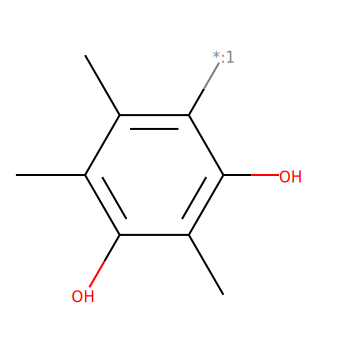

In [37]:
m = Chem.MolFromSmiles(SMILESSTRING)
dm = Draw.PrepareMolForDrawing(m)
d2d = Draw.MolDraw2DSVG(350,350)
d2d.DrawMolecule(dm)
d2d.FinishDrawing()
mol_svg = d2d.GetDrawingText()
SVG(mol_svg)

In [87]:
# in general this is more difficult, but here we know that the R group is atom 6
rIdx = 6
pR = d2d.GetDrawCoords(Geometry.Point2D(dm.GetConformer().GetAtomPosition(rIdx)))
nbr = dm.GetAtomWithIdx(rIdx).GetNeighbors()[0]
pNbr = d2d.GetDrawCoords(Geometry.Point2D(dm.GetConformer().GetAtomPosition(nbr.GetIdx())))
nbrV = pR-pNbr
phi = 180*nbrV.SignedAngleTo(Geometry.Point2D(1,0))/math.pi
print(phi)

60.00000000000001


You can stich together the figure using python and svgutils, which is a bit fiddly as you manually need to move and scale the plot or you can use open source software like Inkscape to load all the SVGs and put them together. 

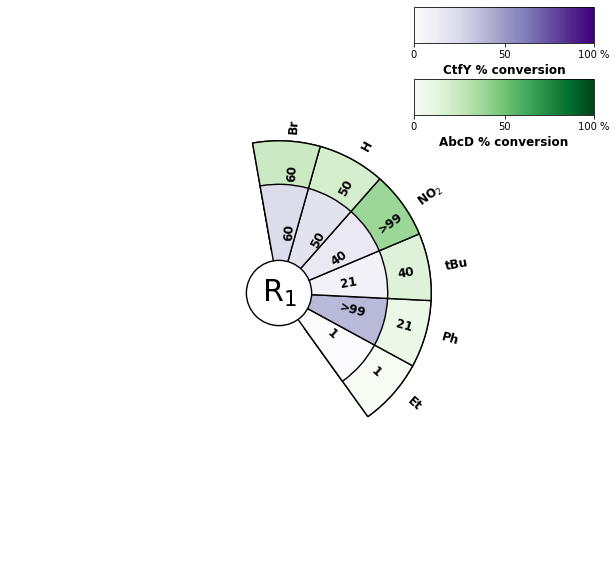

In [64]:
fig, ax = plt.subplots(figsize=(10,10))

ax2cmap1 = plt.axes([0.70, 0.85, 0.25, 0.05])
ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])
size = 0.5
alpha = 0
which_wedge = 0

circle1 = plt.Circle((0, 0), 0.15, color='w', ls='-', ec='k', lw=1.4, gid='circle_anchor')


label = ax.annotate(rest_label, xy=(0, 0), fontsize=30, ha="center", va='center')

cmap_inner = plt.get_cmap(CMAPINNER)
cmap_outer = plt.get_cmap(CMAPOUTER)
outer_colors = cmap_outer(vals[2])
inner_colors = cmap_inner(vals[1])

labels_circle=ax.pie(vals[0], startangle=startangle, radius=0.7, 
                     colors=['w']*len(vals[0]), labels=vals[5], rotatelabels=True,labeldistance=1.1,
                     wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), 
                     textprops=dict(fontsize='large', weight="semibold",va='center') )


outer_circle=ax.pie(vals[0], radius=0.7,startangle=startangle, 
                    colors=outer_colors, labels=vals[3], rotatelabels=True,labeldistance=0.4,
                    wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4),
                    textprops=dict(fontsize='large',weight="semibold",va='center'))

inner_circle=ax.pie(vals[0], startangle=startangle, radius=1-size, 
                    colors=inner_colors, labels=vals[4], rotatelabels=True,labeldistance=1.1,
                    wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), 
                    textprops=dict(fontsize='large', weight="semibold",va='center') )



inner_circle[0][which_wedge].set_alpha(alpha)
outer_circle[0][which_wedge].set_alpha(alpha)
labels_circle[0][which_wedge].set_alpha(alpha)

sm = ScalarMappable(cmap=cmap_inner, norm=plt.Normalize(0,max(vals[1])))
sm.set_array([])
cbar = plt.colorbar(sm,cax=ax2cmap1, orientation="horizontal",ticks=[0,50,99])
cbar.ax.set_xticklabels(['0', '50', '100 %']) 
cbar.set_label(INNERLABEL,weight='bold', fontsize=12)

sm1 = ScalarMappable(cmap=cmap_outer, norm=plt.Normalize(0,max(vals[1])))
sm1.set_array([])
cbar1 = plt.colorbar(sm1,cax=ax2cmap2, orientation="horizontal",ticks=[0,50,99])
cbar1.ax.set_xticklabels(['0', '50', '100 %']) 
cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)


ax.add_artist(circle1)
ax.set(aspect="equal")
plt.show()

### CHANGE NAME IF YOU NEED A SECOND REST
from io import StringIO
sio = StringIO()
fig.savefig(sio, transparent=True, format='SVG')
fig_svg = sio.getvalue()


In [24]:
# for some reason svgutils doesn't have a primitive to construct an Element from svg text. Fix that
from svgutils import transform,compose
class strSVG(compose.Element):
    """SVG from string.

    Parameters
    ----------
    fname : str
       full path to the file
    """

    def __init__(self, svg):
        obj = transform.fromstring(svg)
        self.root = obj.getroot().root


In [78]:
o = strSVG(fig_svg)
e = o.find_id('circle_anchor')
pcirc = [float(x) for x in e.root.getchildren()[0].attrib['d'].split('C')[0].strip().split(' ')[1:]]
sc.Figure("16cm", "16cm", 
    sc.Panel(strSVG(mol_svg).scale(1)),
    sc.Panel(strSVG(fig_svg).move(-pcirc[0],-pcirc[1]).scale(0.705).move(pR.x,pR.y)),
        #sc.Panel(sc.SVG("R2.svg").scale(0.705).move(110,-30)), #add another Panel for a second R
    ).move(0,200).save("substrate_scope.svg")
SVG('substrate_scope.svg')

In [10]:
sio.